## Step 1: Export Data from Your FinViz Notebook

In your `stock-sentiment-from-news-headlines.ipynb`, add this cell after scraping:

```python
# Export parsed_news to CSV
import pandas as pd

columns = ['ticker', 'date', 'time', 'headline']
df = pd.DataFrame(parsed_news, columns=columns)
df.to_csv('../data/raw/finviz_news.csv', index=False)

print(f"✓ Saved {len(df)} REAL headlines")
```

## Step 2: Load the Real FinViz Data

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Create necessary directories
Path('../reports/figures').mkdir(parents=True, exist_ok=True)
Path('../data/raw').mkdir(parents=True, exist_ok=True)
Path('../data/interim').mkdir(parents=True, exist_ok=True)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

%matplotlib inline

print("✓ Setup complete - directories created")

✓ Setup complete - directories created


In [2]:
# Load the REAL FinViz data
finviz_path = '../data/raw/finviz_news.csv'

if not Path(finviz_path).exists():
    print("❌ FinViz data not found!")
    print("\nPlease:")
    print("1. Run your stock-sentiment-from-news-headlines.ipynb notebook")
    print("2. Export parsed_news to CSV (see Step 1 above)")
    print("3. Make sure finviz_news.csv is saved to data/raw/")
else:
    df = pd.read_csv(finviz_path)
    print(f"✓ Loaded {len(df)} REAL FinViz headlines")
    print(f"\nColumns: {df.columns.tolist()}")
    print(f"\nTickers: {df['ticker'].unique()}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"\nFirst few headlines:")
    display(df.head(10))

✓ Loaded 300 REAL FinViz headlines

Columns: ['ticker', 'date', 'time', 'headline']

Tickers: ['MSFT' 'AAPL' 'NVDA']
Date range: Nov-06-25 to Nov-11-25

First few headlines:


,ticker,date,time,headline
0,MSFT,Nov-11-25,04:21PM,What Tesla Stock Looks Like in 10 Years If Mus...
1,MSFT,Nov-11-25,04:07PM,"Nebius Reports Bigger Q3 Net Income Loss, Anno..."
2,MSFT,Nov-11-25,04:01PM,CoreWeave Falls As Data Center Issue Hits Capi...
3,MSFT,Nov-11-25,02:46PM,Rumble's $767M Acquisition Marks Bold Pivot In...
4,MSFT,Nov-11-25,02:24PM,CoreWeave Bends the Law of Large Numbers: Hear...
5,MSFT,Nov-11-25,01:18PM,Microsoft Brings $10 Billion AI Data Center to...
6,MSFT,Nov-11-25,12:04PM,"Microsoft, Google to Invest Over $16 Billion t..."
7,MSFT,Nov-11-25,11:52AM,Is the AI Buildout Propping Up U.S. GDP?
8,MSFT,Nov-11-25,11:31AM,"SoftBanks Nvidia Exit Raises Eyebrows, But Ana..."
9,MSFT,Nov-11-25,11:30AM,Apple Turns AI Caution Into Gold as Rivals Dro...


In [ ]:
## Step 3: Initialize VADER Sentiment Analyzer

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon', quiet=True)

# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

# Optional: Add financial terms to the lexicon
financial_lexicon = {
    'surge': 2.5, 'soar': 2.0, 'rally': 1.5, 'gain': 1.5,
    'beat': 1.0, 'bullish': 1.5, 'upgrade': 1.5,
    'plunge': -2.5, 'crash': -2.5, 'tumble': -2.0, 'fall': -1.5,
    'miss': -1.0, 'bearish': -1.5, 'downgrade': -1.5,
    'outperform': 1.5, 'underperform': -1.5
}

analyzer.lexicon.update(financial_lexicon)

print("✓ VADER initialized with financial lexicon")

In [3]:
# Score sentiment for all headlines
def score_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return pd.Series(scores)

print("Scoring sentiment for REAL FinViz headlines...")
sentiment_scores = df['headline'].apply(score_sentiment)
df = pd.concat([df, sentiment_scores], axis=1)

print(f"✓ Scored {len(df)} headlines")
df[['headline', 'pos', 'neg', 'neu', 'compound']].head(10)

Scoring sentiment for REAL FinViz headlines...


NameError: name 'analyzer' is not defined

## Step 4: Market Day Alignment

In [ ]:
from src.utils import align_to_market_day

# Combine date and time into timestamp
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce')

# Align to market days (news after 4 PM goes to next day)
df['market_day'] = df['timestamp'].apply(align_to_market_day)

print("✓ Aligned to market days")
df[['timestamp', 'market_day', 'ticker', 'headline']].head(10)

✓ Aligned to market days


C:\Users\PC\AppData\Local\Temp\ipykernel_46248\3309243431.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce')


,timestamp,market_day,ticker,headline
0,2025-11-11 16:21:00,2025-11-11 00:00:00-05:00,MSFT,What Tesla Stock Looks Like in 10 Years If Mus...
1,2025-11-11 16:07:00,2025-11-11 00:00:00-05:00,MSFT,"Nebius Reports Bigger Q3 Net Income Loss, Anno..."
2,2025-11-11 16:01:00,2025-11-11 00:00:00-05:00,MSFT,CoreWeave Falls As Data Center Issue Hits Capi...
3,2025-11-11 14:46:00,2025-11-11 00:00:00-05:00,MSFT,Rumble's $767M Acquisition Marks Bold Pivot In...
4,2025-11-11 14:24:00,2025-11-11 00:00:00-05:00,MSFT,CoreWeave Bends the Law of Large Numbers: Hear...
5,2025-11-11 13:18:00,2025-11-11 00:00:00-05:00,MSFT,Microsoft Brings $10 Billion AI Data Center to...
6,2025-11-11 12:04:00,2025-11-11 00:00:00-05:00,MSFT,"Microsoft, Google to Invest Over $16 Billion t..."
7,2025-11-11 11:52:00,2025-11-11 00:00:00-05:00,MSFT,Is the AI Buildout Propping Up U.S. GDP?
8,2025-11-11 11:31:00,2025-11-11 00:00:00-05:00,MSFT,"SoftBanks Nvidia Exit Raises Eyebrows, But Ana..."
9,2025-11-11 11:30:00,2025-11-11 00:00:00-05:00,MSFT,Apple Turns AI Caution Into Gold as Rivals Dro...


## Step 5: Daily Aggregation

In [ ]:
# Aggregate to daily level per ticker
daily_sentiment = df.groupby(['ticker', 'market_day']).agg({
    'pos': 'mean',
    'neg': 'mean',
    'neu': 'mean',
    'compound': 'mean',
    'headline': 'count'  # Number of headlines
}).reset_index()

# Rename count column
daily_sentiment.rename(columns={'headline': 'sent_count'}, inplace=True)

print(f"✓ Aggregated to {len(daily_sentiment)} daily records")
daily_sentiment.head(10)

✓ Aggregated to 11 daily records


,ticker,market_day,pos,neg,neu,compound,sent_count
0,AAPL,2025-11-06 00:00:00-05:00,0.115818,0.056727,0.827545,0.094982,11
1,AAPL,2025-11-07 00:00:00-05:00,0.097731,0.056962,0.845269,0.079112,26
2,AAPL,2025-11-08 00:00:00-05:00,0.172125,0.044000,0.784000,0.304337,8
3,AAPL,2025-11-09 00:00:00-05:00,0.103625,0.046250,0.850125,0.072987,8
4,AAPL,2025-11-10 00:00:00-05:00,0.146800,0.040333,0.812867,0.186327,30
5,AAPL,2025-11-11 00:00:00-05:00,0.116882,0.052118,0.830941,0.124806,17
6,MSFT,2025-11-08 00:00:00-05:00,0.136667,0.054000,0.809333,0.212250,6
7,MSFT,2025-11-09 00:00:00-05:00,0.114750,0.063833,0.821250,0.167542,12
8,MSFT,2025-11-10 00:00:00-05:00,0.126979,0.033708,0.839313,0.192096,48
9,MSFT,2025-11-11 00:00:00-05:00,0.109647,0.081324,0.809029,0.050888,34


In [ ]:
# Add surprise features (deviation from 20-day average)
for col in ['pos', 'neg', 'compound']:
    daily_sentiment[f'{col}_ma20'] = daily_sentiment.groupby('ticker')[col].transform(
        lambda x: x.rolling(20, min_periods=1).mean()
    )
    daily_sentiment[f'{col}_surprise'] = daily_sentiment[col] - daily_sentiment[f'{col}_ma20']

print("✓ Added surprise features")
daily_sentiment[['ticker', 'market_day', 'compound', 'compound_surprise']].head(10)

✓ Added surprise features


,ticker,market_day,compound,compound_surprise
0,AAPL,2025-11-06 00:00:00-05:00,0.094982,0.000000
1,AAPL,2025-11-07 00:00:00-05:00,0.079112,-0.007935
2,AAPL,2025-11-08 00:00:00-05:00,0.304337,0.144861
3,AAPL,2025-11-09 00:00:00-05:00,0.072987,-0.064867
4,AAPL,2025-11-10 00:00:00-05:00,0.186327,0.038778
5,AAPL,2025-11-11 00:00:00-05:00,0.124806,-0.018953
6,MSFT,2025-11-08 00:00:00-05:00,0.212250,0.000000
7,MSFT,2025-11-09 00:00:00-05:00,0.167542,-0.022354
8,MSFT,2025-11-10 00:00:00-05:00,0.192096,0.001467
9,MSFT,2025-11-11 00:00:00-05:00,0.050888,-0.104806


## Step 6: Visualize Real Sentiment

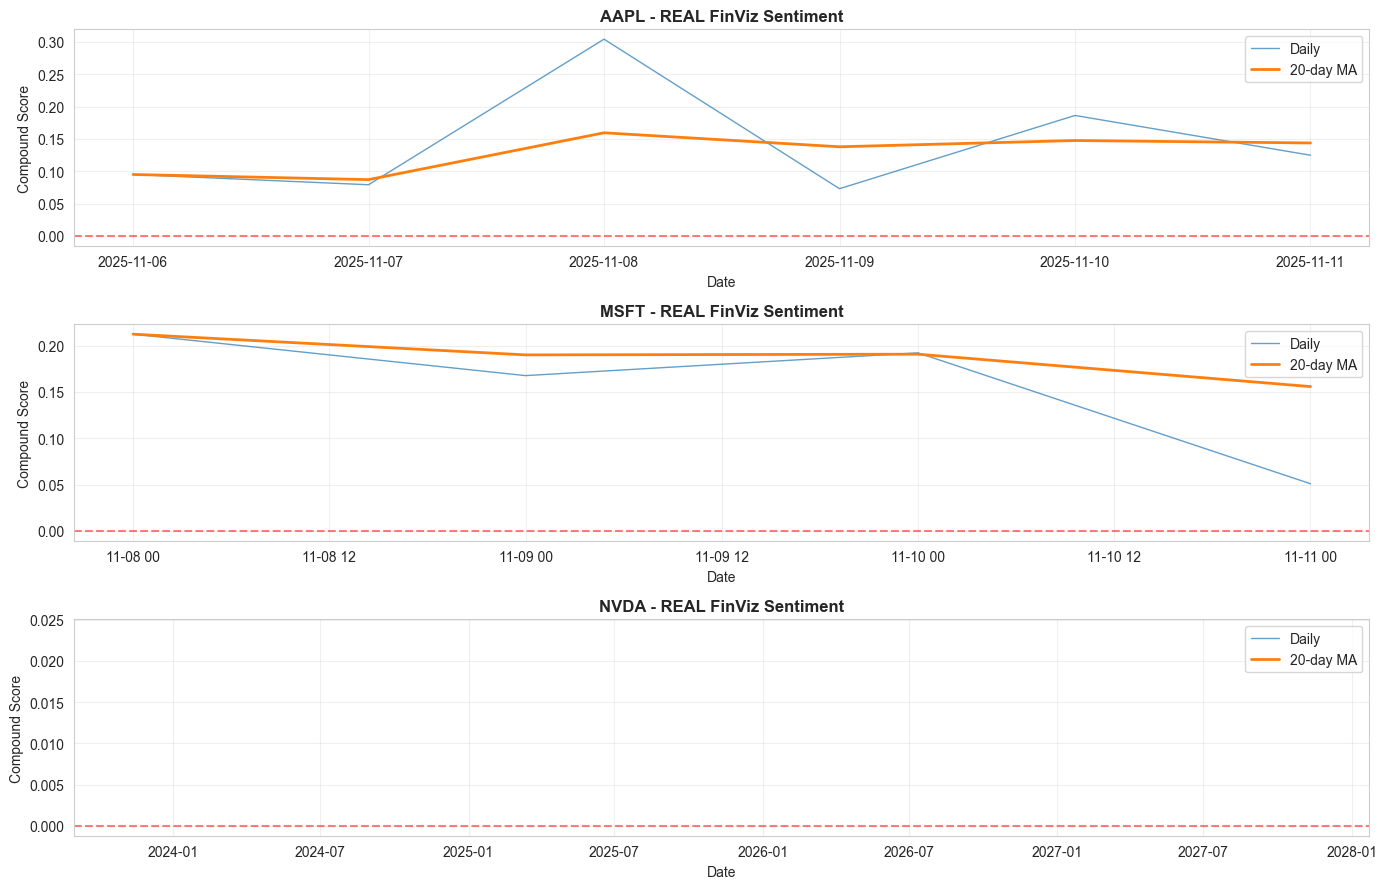

In [ ]:
# Plot compound sentiment over time
tickers = daily_sentiment['ticker'].unique()

fig, axes = plt.subplots(len(tickers), 1, figsize=(14, 3*len(tickers)))

if len(tickers) == 1:
    axes = [axes]

for i, ticker in enumerate(tickers):
    ticker_data = daily_sentiment[daily_sentiment['ticker'] == ticker]
    
    axes[i].plot(ticker_data['market_day'], ticker_data['compound'], 
                linewidth=1, alpha=0.7, label='Daily')
    axes[i].plot(ticker_data['market_day'], ticker_data['compound_ma20'], 
                linewidth=2, label='20-day MA')
    axes[i].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    axes[i].set_title(f'{ticker} - REAL FinViz Sentiment', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Compound Score')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/real_finviz_sentiment.png', dpi=150, bbox_inches='tight')
plt.show()

## Step 7: Save Processed Real Data

In [ ]:
# Save to parquet
output_path = '../data/interim/sentiment_daily.parquet'
daily_sentiment.to_parquet(output_path, index=False)

print(f"✓ Saved REAL sentiment data to {output_path}")
print(f"\nShape: {daily_sentiment.shape}")
print(f"Date range: {daily_sentiment['market_day'].min()} to {daily_sentiment['market_day'].max()}")
print(f"Tickers: {daily_sentiment['ticker'].unique()}")
print(f"\nThis is REAL FinViz data, not sample data!")

✓ Saved REAL sentiment data to ../data/interim/sentiment_daily.parquet

Shape: (11, 13)
Date range: 2025-11-06 00:00:00-05:00 to 2025-11-11 00:00:00-05:00
Tickers: ['AAPL' 'MSFT' 'NVDA']

This is REAL FinViz data, not sample data!


## Summary Statistics

In [ ]:
# Summary by ticker
summary = daily_sentiment.groupby('ticker').agg({
    'compound': ['mean', 'std', 'min', 'max'],
    'sent_count': ['mean', 'sum'],
    'market_day': ['min', 'max']
}).round(4)

print("\nREAL FinViz Sentiment Statistics:")
print(summary)


REAL FinViz Sentiment Statistics:
       compound                         sent_count       \
           mean     std     min     max       mean  sum   
ticker                                                    
AAPL     0.1438  0.0889  0.0730  0.3043    16.6667  100   
MSFT     0.1557  0.0722  0.0509  0.2122    25.0000  100   
NVDA     0.0239     NaN  0.0239  0.0239   100.0000  100   

                      market_day                            
                             min                       max  
ticker                                                      
AAPL   2025-11-06 00:00:00-05:00 2025-11-11 00:00:00-05:00  
MSFT   2025-11-08 00:00:00-05:00 2025-11-11 00:00:00-05:00  
NVDA   2025-11-11 00:00:00-05:00 2025-11-11 00:00:00-05:00  


## Next Steps

Now that you have REAL sentiment data:

```bash
# Download prices
python -m src.download_prices --tickers MCD AAPL --start 2020-01-01

# Create dataset
python -m src.make_dataset \
    --prices data/raw/prices.parquet \
    --sentiment data/interim/sentiment_daily.parquet \
    --out data/processed/dataset.parquet

# Train model
python -m src.train_lstm --dataset data/processed/dataset.parquet
```

Or use the automated pipeline:
```bash
python run_pipeline.py --tickers MCD AAPL
```